# Heart Disease Analysis
### By:  Sanath Kapoor
#### 20/07/2021

## Introduction
Predicting whether a person has a 'Heart Disease' or 'No Heart Disease'. This is an example of *Supervised Machine Learning* as the outcome is already known. It is a Classification Problem as we have to classify the outcomes into two classes:

 * 1(One) as having Heart Disease
 * 0(Zero) as not having Heart Disease

## Data Exploration
The Heart Disease dataset can be downloaded from [Kaggle](https://www.kaggle.com/priyanka841/heart-disease-prediction-uci)

### Loading Basic Libraries

In [3]:
library(tidyverse)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


### Reading the csv file

Here we are using the `read.csv` functions in order to upload the .csv file where as the `head()` function is being used to display the first six rows of our dataset.

In [4]:
data <- read.csv("heart.csv")
head(data)

ï..age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
57,1,0,140,192,0,1,148,0,0.4,1,0,1,1


There after we use the `glimpse()` function which helps us to get an idea about the total number of rows and columns in our dataset as well as it also tells us the data type of each coulmn. Here, we can see that our dataset contains of *303 rows* and *14 columns*

In [5]:
glimpse(data)

Observations: 303
Variables: 14
$ ï..age   <int> 63, 37, 41, 56, 57, 57, 56, 44, 52, 57, 54, 48, 49, 64, 58...
$ sex      <int> 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0...
$ cp       <int> 3, 2, 1, 1, 0, 0, 1, 1, 2, 2, 0, 2, 1, 3, 3, 2, 2, 3, 0, 3...
$ trestbps <int> 145, 130, 130, 120, 120, 140, 140, 120, 172, 150, 140, 130...
$ chol     <int> 233, 250, 204, 236, 354, 192, 294, 263, 199, 168, 239, 275...
$ fbs      <int> 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0...
$ restecg  <int> 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1...
$ thalach  <int> 150, 187, 172, 178, 163, 148, 153, 173, 162, 174, 160, 139...
$ exang    <int> 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0...
$ oldpeak  <dbl> 2.3, 3.5, 1.4, 0.8, 0.6, 0.4, 1.3, 0.0, 0.5, 1.6, 1.2, 0.2...
$ slope    <int> 0, 0, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 0, 2, 2...
$ ca       <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2...
$ thal     <int> 1, 

Now, we use the function `summary()` in order to get the statistical information regarding our dataset. The statistical information includes *the minimum value, the maximum value, 1st Quartile, 3rd Quartile, Mean and Median values* for every column.

In [6]:
summary(data)

     ï..age           sex               cp           trestbps    
 Min.   :29.00   Min.   :0.0000   Min.   :0.000   Min.   : 94.0  
 1st Qu.:47.50   1st Qu.:0.0000   1st Qu.:0.000   1st Qu.:120.0  
 Median :55.00   Median :1.0000   Median :1.000   Median :130.0  
 Mean   :54.37   Mean   :0.6832   Mean   :0.967   Mean   :131.6  
 3rd Qu.:61.00   3rd Qu.:1.0000   3rd Qu.:2.000   3rd Qu.:140.0  
 Max.   :77.00   Max.   :1.0000   Max.   :3.000   Max.   :200.0  
      chol            fbs            restecg          thalach     
 Min.   :126.0   Min.   :0.0000   Min.   :0.0000   Min.   : 71.0  
 1st Qu.:211.0   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:133.5  
 Median :240.0   Median :0.0000   Median :1.0000   Median :153.0  
 Mean   :246.3   Mean   :0.1485   Mean   :0.5281   Mean   :149.6  
 3rd Qu.:274.5   3rd Qu.:0.0000   3rd Qu.:1.0000   3rd Qu.:166.0  
 Max.   :564.0   Max.   :1.0000   Max.   :2.0000   Max.   :202.0  
     exang           oldpeak         slope             ca        
 Mi

### Dataset Description
There are 14 features(columns) including the target. The features included in this dataset are:
1. **age:** displays the age of the individual in years
2. **sex:** displays the gender of the individual
    + 0: Female
    + 1: Male
3. **cp:** Displays the type of chest pain experienced by the individual
    + 1: atypical angina
    + 2: non-anginal pain
    + 3: asymptomatic angina
4. **trestbps:** Displays the resting blood pressure value of an individual in mmHg(unit)
5. **chol:** Displays the serum cholestrol in mg/dl
6. **fbs:** Compares the fasting blood sugar level of an individual relative to 120 mg/dl:
    + 0: fasting blooad sugar <= 120 mg/dl
    + 1: fasting blooad sugar > 120 mg/dl
7. **restecg:** Displays resting electrocardiographic(ECG) results:
    + 0: normal
    + 1: ST-T wave abnormality
    + 2: left ventrical hyperthropy
8. **thalach:** Displays the max heart rate achieved by an individual
9. **exang:** Exercise induced chest pain
    + 0: No
    + 1: Yes
10. **oldpeak:** ST(stress test) depression induced by exercise relative to rest, a measure of abnormality in electrocardiograms
11. **slope:** The slope of the peak exercise ST segment, an electrocardiography read out indicating quality of blood flow to the heart
    + 0: upsloaping
    + 1: flat
    + 2: downsloaping
12. **ca:** Number of major vessels(0-3) colored by flourosopy
13. **thal:** Displays the thalassemia with possible values:
    + normal
    + fixed_defect
    + reversible_defect
14. **target:** Displays whether the individual is suffering from heart disease or not:
    + 0: absence
    + 1: present

## Data Transformation

Now, that we are done exploring our dataset its time to transform our dataset for better readability so that it becomes easy to perform our analysis.
In the step below, we create another dataset called ***data1*** consisting of our previous dataset called ***data*** and mutate it.
As we know that certain columns have data entered in the form of binary, so by mutating the below mentioned columns, what we are actually doing is creating conditional statements by using `if_else` function in order for our data to be recognized the way we want it to be.

As we can see, we mutate the column named ***sex*** by using `if_else` function and what we are actually doing here is giving the command such that if the *value of sex is 1* it gets replaced by **MALE** and if the *value of sex is 0* it gets replaced by **FEMALE**.
Similarly, we mutate rest of the columns consisting of such binary data.

At last we use to ***dplyr*** package which is used for data manipulation.

In [7]:
data1 <- data %>% 
    mutate(sex = if_else(sex == 1, "MALE", "FEMALE"),
           fbs = if_else(fbs == 1, ">120", "<=120"),
           exang = if_else(exang == 1, "YES", "NO"),
           cp = if_else(cp == 1, "ATYPICAL ANGINA",
                        if_else(cp == 2, "NON-ANGINAL PAIN", "ASYMPTOMATIC")),
           restecg = if_else(restecg == 0, "NORMAL",
                             if_else(restecg == 1, "ABNORMALITY", "PROBABLE OR DEFINITE")),
           slope = as.factor(slope),
           ca = as.factor(ca),
           thal = as.factor(thal),
           target = if_else(target == 1, "YES", "NO")
          ) %>% 
mutate_if(is.character, as.factor) %>% 
dplyr::select(target, sex, fbs, exang, cp, restecg, slope, ca, thal, everything())

*We can use the `head()` function to see our new dataset.*

In [8]:
head(data1)

target,sex,fbs,exang,cp,restecg,slope,ca,thal,ï..age,trestbps,chol,thalach,oldpeak
YES,MALE,>120,NO,ASYMPTOMATIC,NORMAL,0,0,1,63,145,233,150,2.3
YES,MALE,<=120,NO,NON-ANGINAL PAIN,ABNORMALITY,0,0,2,37,130,250,187,3.5
YES,FEMALE,<=120,NO,ATYPICAL ANGINA,NORMAL,2,0,2,41,130,204,172,1.4
YES,MALE,<=120,NO,ATYPICAL ANGINA,ABNORMALITY,2,0,2,56,120,236,178,0.8
YES,FEMALE,<=120,YES,ASYMPTOMATIC,ABNORMALITY,2,0,2,57,120,354,163,0.6
YES,MALE,<=120,NO,ASYMPTOMATIC,ABNORMALITY,1,0,1,57,140,192,148,0.4


## Data Visualization

We use the ***ggplot2*** package that contains several functions which make the Data Visualization task in R very interactive and easy.

### Bar plot for target (heart disease)

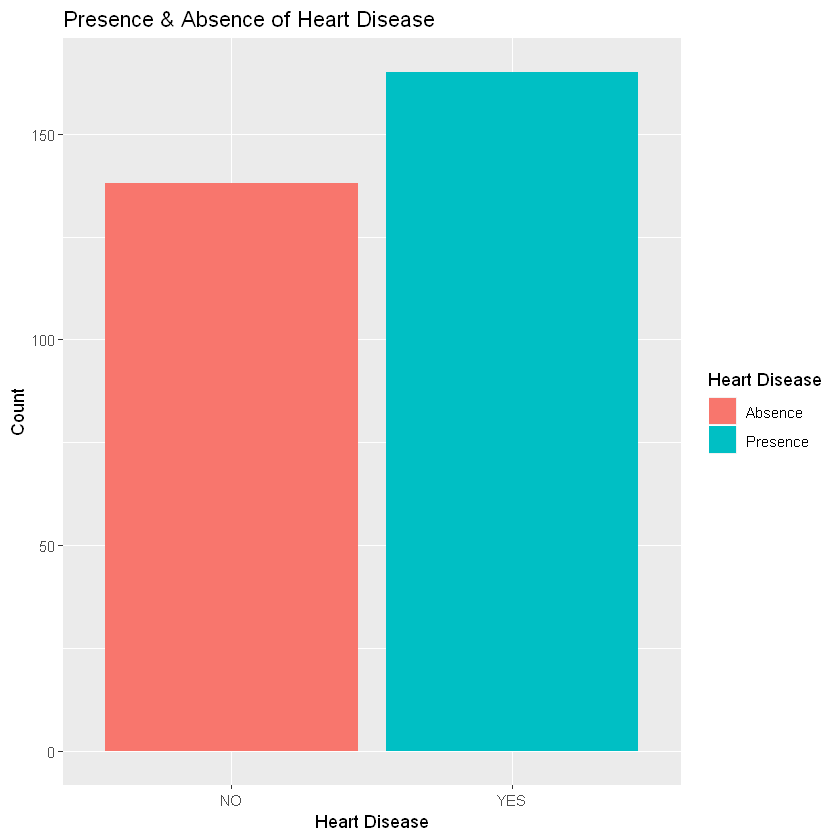

In [12]:
ggplot(data1, aes(x=data1$target, fill=data1$target))+
    geom_bar()+
    xlab("Heart Disease")+
    ylab("Count")+
    ggtitle("Presence & Absence of Heart Disease")+
    scale_fill_discrete(name = 'Heart Disease', labels = c("Absence","Presence"))

Let us now see that what percent of the total are having *heart disease* and what percent of the total are *not having heart disease.* 
In order to do this we use the `prop.table()` function.

In [13]:
prop.table(table(data1$target))


       NO       YES 
0.4554455 0.5445545 

>aproximately **46%** of the people are  *not having heart disease* whereas, aproximately **54%** of the people are *having heart disease*.

### Frequency of the values of age

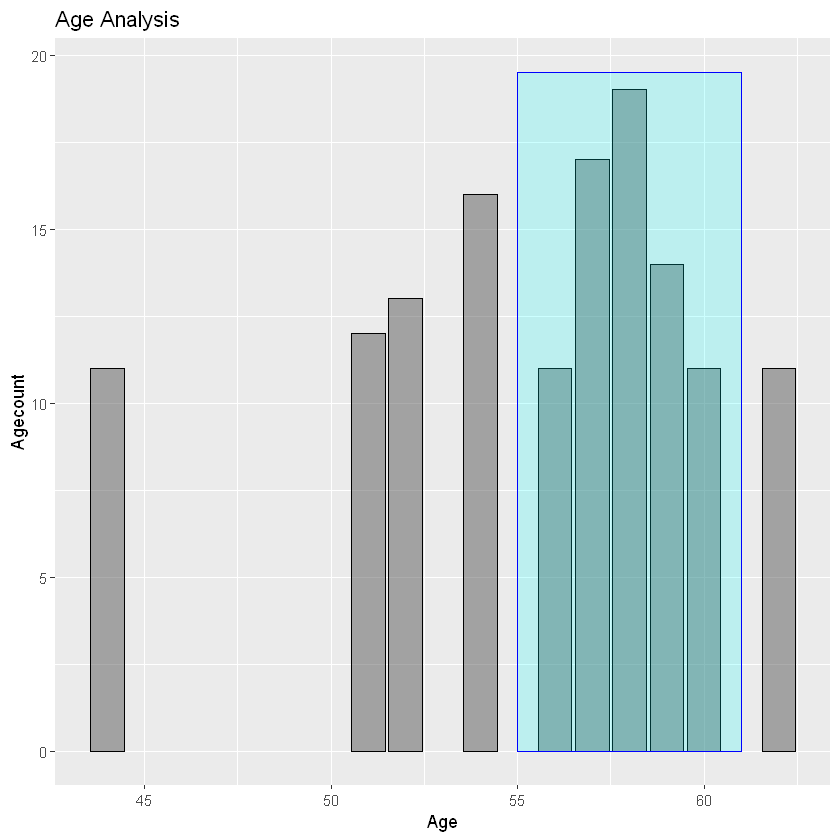

In [72]:
data1 %>% 
    group_by(ï..age) %>% 
    count() %>% 
    filter(n>10) %>% 
    ggplot()+
    geom_col(aes(ï..age, n), alpha = 0.5, color = "black")+
    ggtitle("Age Analysis")+
    xlab("Age")+
    ylab("Agecount")+
    annotate("rect", xmin=(55), xmax=(61), ymin=(0), ymax=(19.5), alpha = 0.2, color="blue", fill="cyan")

From the **Age Analysis** graph above we can see that most of the people are lying between the age group of ***55 to 60*** and the least number of people are between the age group of ***45 to 50***.

### Comparing blood pressure across the chest pain type

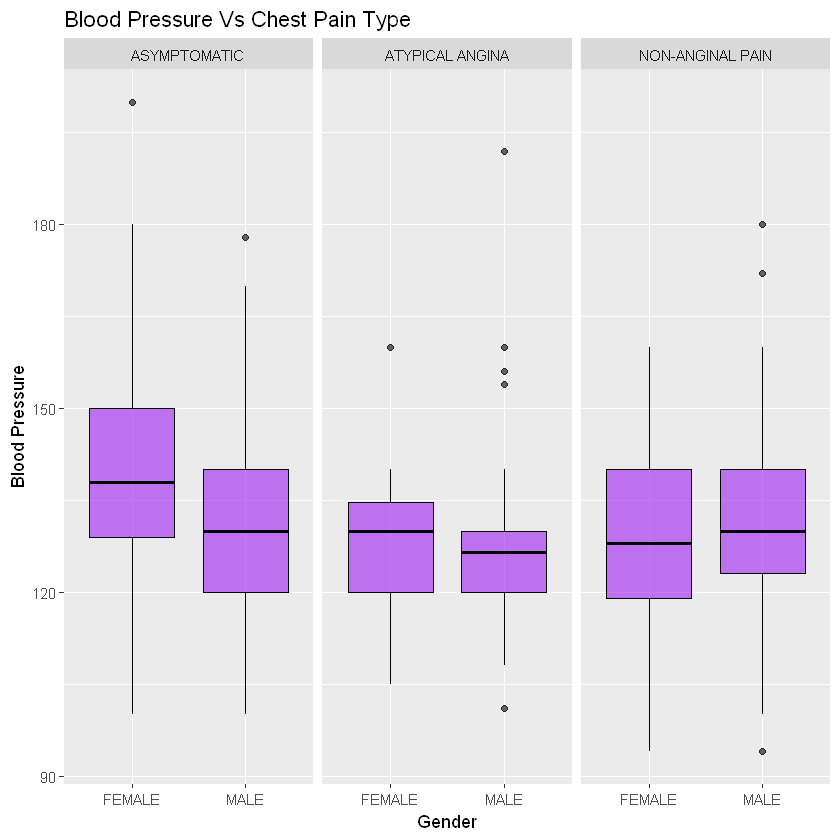

In [73]:
data1 %>% 
    ggplot(aes(x=sex, y=trestbps))+
    geom_boxplot(color="black", fill="purple", alpha = 0.6)+
    ggtitle("Blood Pressure Vs Chest Pain Type")+
    xlab("Gender")+
    ylab("Blood Pressure")+
    facet_grid(~cp)

In the **Boxplot** above we are comapring the *Resting Blood Pressure* of each Gender type with the type of *Chest Pain*.<br>
We use the `facet_grid()` function to split the plot into matrix of panels where each panel is showing different subset of the data which in this case reffers to the **Different types of Chest Pain**.<br><br>
So, from all the three plots for different chest pains we can observe that there are quite a few outliers in case of *Males* as compared to *Females*.<br>
This shows that *Males* are more inclined to get *pain in their chest* as compared to the *Females* because of the **Rising Blood Pressure**.


### Comparing cholestrol across the chest pain type

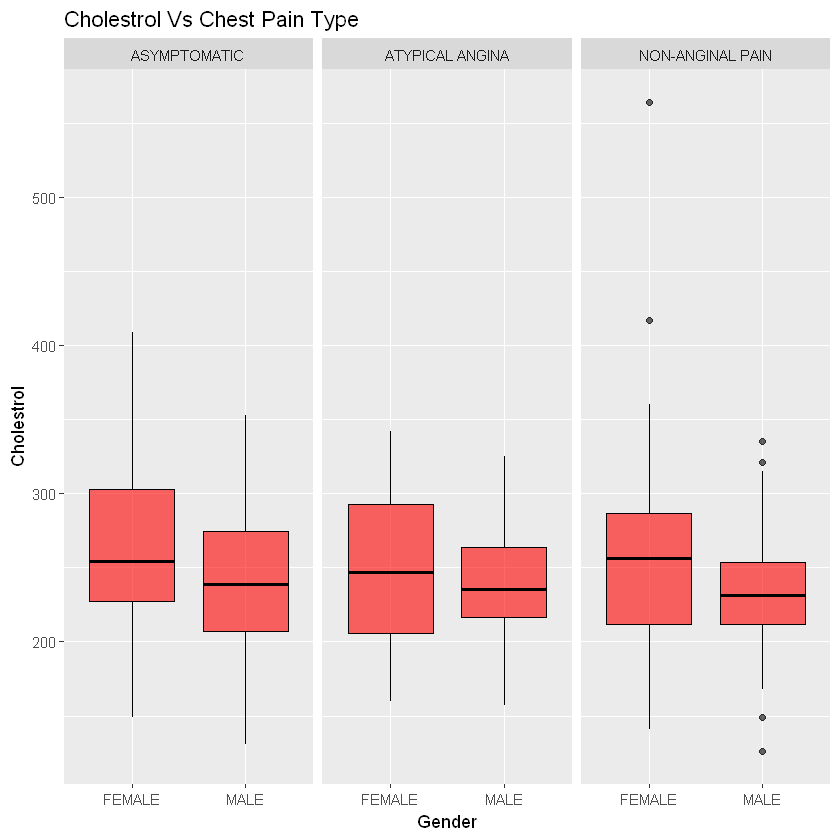

In [74]:
data1 %>% 
    ggplot(aes(x=sex, y=chol))+
    geom_boxplot(color="black", fill="red", alpha = 0.6)+
    ggtitle("Cholestrol Vs Chest Pain Type")+
    xlab("Gender")+
    ylab("Cholestrol")+
    facet_grid(~cp)

In the **Boxplot** above we are comapring the *Cholestrol Level* of each Gender type with the type of *Chest Pain*.<br>
We use the `facet_grid()` function to split the plot into matrix of panels where each panel is showing different subset of the data which in this case reffers to the **Different types of Chest Pain**.<br><br>
So, from all the three plots for different chest pains we can observe that outliers are only present in the case of <u>*Non-Anginal Pain*</u>.<br>
From the boxplot for the <u>*Non-Anginal Pain*</u> we can see that *Females* are more likely to experience this type of pain as compared to *Males* because of **High Cholestrol Level**.

### Cholestrol Level Vs Resting Blood Pressure

In the graph shown below we plot a scatterplot for **Cholestrol Level**(*chol*) and **Resting Blood Pressure**(*trestbps*) for each Gender type and then use the `facet_grid()` function to split the plot into different subsets, which in this case reffers to whether a person is **Having Heart Disease** or **Not Having Heart Disease**.

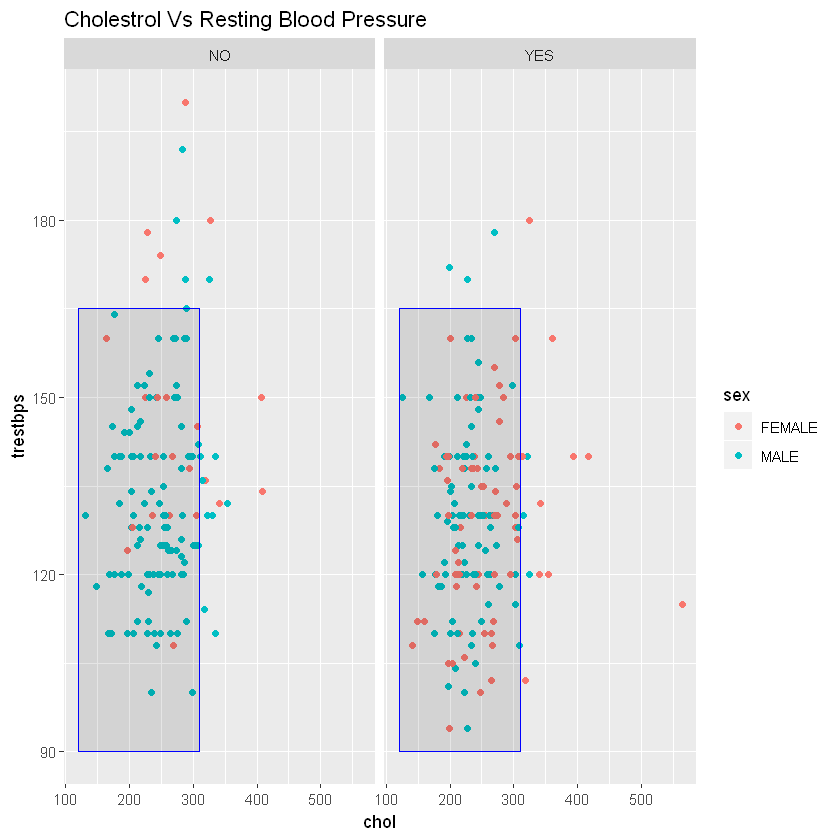

In [75]:
 ggplot(data1)+
    geom_point(mapping = aes(x = chol, y = trestbps, color = sex))+
    labs(title = "Cholestrol Vs Resting Blood Pressure")+
    annotate("rect", xmin = (120), ymin = (90), xmax = (310), ymax = (165), color = "blue", fill = "black", alpha = 0.1)+
    facet_grid(~target)

So from the highlted part in the plot shown above we can observe that *Females* having <u>*Cholestrol Level*</u> in the range of **120-310** & <u>*Resting Blood Pressure*</u> between* **90-150** are having quite high chances of ***Having Heart Disease*** as compared to *Males*.

## Correlation

Installing `corrplot` & `ggplot2` packages to perform correlation.

In [76]:
install.packages("corrplot")
install.packages("ggplot2")


  There is a binary version available but the source version is later:
         binary source needs_compilation
corrplot   0.88   0.90             FALSE



installing the source package 'corrplot'

also installing the dependency 'rlang'




  There is a binary version available but the source version is later:
        binary source needs_compilation
ggplot2  3.3.3  3.3.5             FALSE

package 'rlang' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'rlang'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\kapoo\anaconda3\envs\R\Lib\R\library\00LOCK\rlang\libs\x64\rlang.dll to C:\Users\kapoo\anaconda3\envs\R\Lib\R\library\rlang\libs\x64\rlang.dll: Permission denied"Warning message:
"restored 'rlang'"


The downloaded binary packages are in
	C:\Users\kapoo\AppData\Local\Temp\RtmpsPGdHg\downloaded_packages


installing the source package 'ggplot2'

Warning message in install.packages("ggplot2"):
"installation of package 'ggplot2' had non-zero exit status"

In [77]:
library(corrplot)
library(ggplot2)

corrplot 0.90 loaded


### Correlation Matrix

In [78]:
cor_heart <- cor(data1[, 10:14])
cor_heart

,ï..age,trestbps,chol,thalach,oldpeak
ï..age,1.0000000,0.27935091,0.213677957,-0.398521938,0.21001257
trestbps,0.2793509,1.00000000,0.123174207,-0.046697728,0.19321647
chol,0.2136780,0.12317421,1.000000000,-0.009939839,0.05395192
thalach,-0.3985219,-0.04669773,-0.009939839,1.000000000,-0.34418695
oldpeak,0.2100126,0.19321647,0.053951920,-0.344186948,1.00000000


From the **Correlation Matrix** shown above we can see that the numeric entries along the main diagonal from top left to bottom right are ones. One could show (by hand) that the correlation of two identical random variables is one. (I.e. Correlation of chol and chol is one).<br>
Therefore, it is well observed that a correlation matrix is a *symmetric matrix*

### Correlation Plot

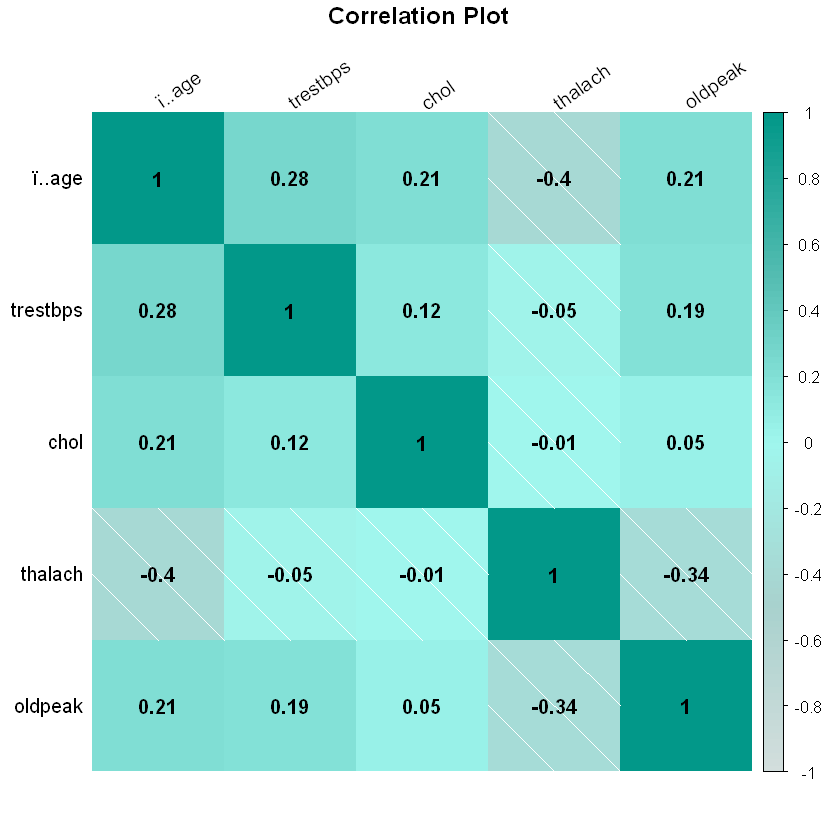

In [95]:
colour_set <- colorRampPalette(colors = c("#d3dedd", "#a9d2ce", "#a0f7ee", "#56beb3", "#029889"))

corrplot(cor_heart, method = "shade", bg = "White", tl.srt = 35, tl.col = "black",
         title = "\n\n Correlation Plot \n",
         addCoef.col = "black", type = "full",
         col = colour_set(100))